<a href="https://colab.research.google.com/github/ShauryaCodes2004/internship_Assignemnts/blob/main/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/netflix_titles.csv")

In [4]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
import seaborn as sns

In [8]:
df.shape

(8807, 12)

In [9]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [11]:
df.isnull().sum()/len(df)*100

,0
show_id,0.000000
type,0.000000
title,0.000000
director,29.908028
cast,9.367549
country,9.435676
date_added,0.113546
release_year,0.000000
rating,0.045418
duration,0.034064


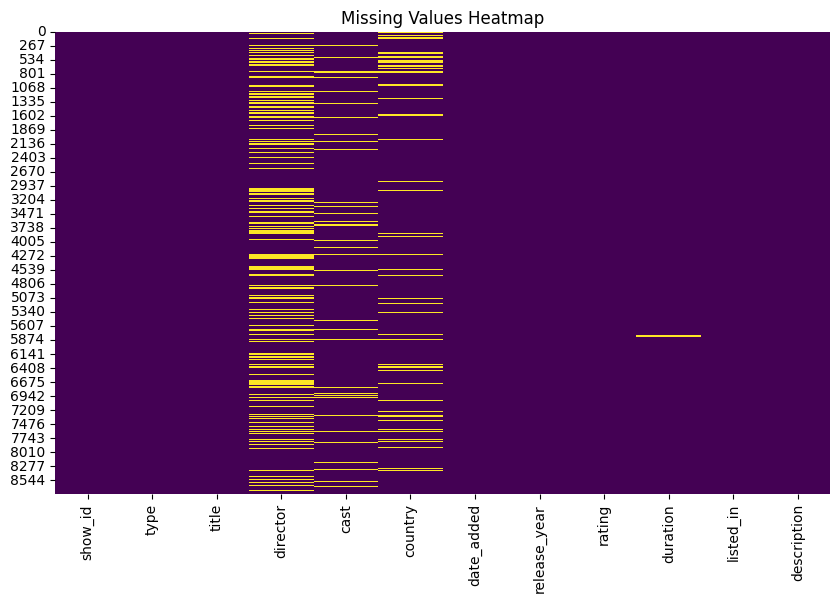

In [12]:
# Plot missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')  # cbar=False hides color bar
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
# prompt: fill missing value with machine learning algo



# Import necessary libraries

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from sklearn.ensemble import RandomForestRegressor



# Create a copy to avoid modifying the original DataFrame

df_filled = df.copy()



# Separate numerical and categorical columns

numerical_cols = df_filled.select_dtypes(include=['number']).columns

categorical_cols = df_filled.select_dtypes(exclude=['number']).columns



# Use IterativeImputer for numerical features

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)

df_filled[numerical_cols] = imputer_num.fit_transform(df_filled[numerical_cols])



# Fill categorical features with the mode (most frequent value)

for col in categorical_cols:

    df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])



# Verify if there are any missing values left

print("\nMissing values after imputation:\n", df_filled.isnull().sum())


Missing values after imputation:
 show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64



Type Count:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64


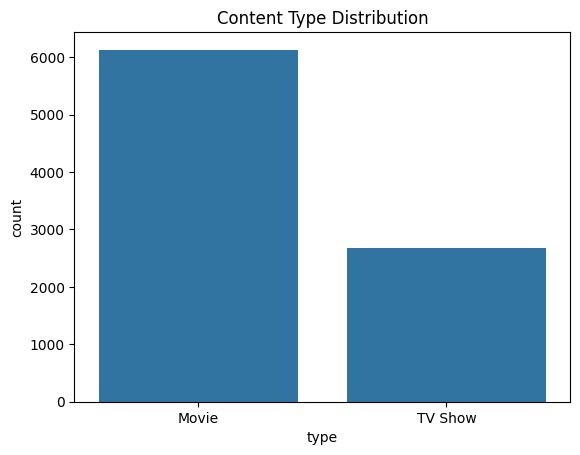


Rating Distribution:
 rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


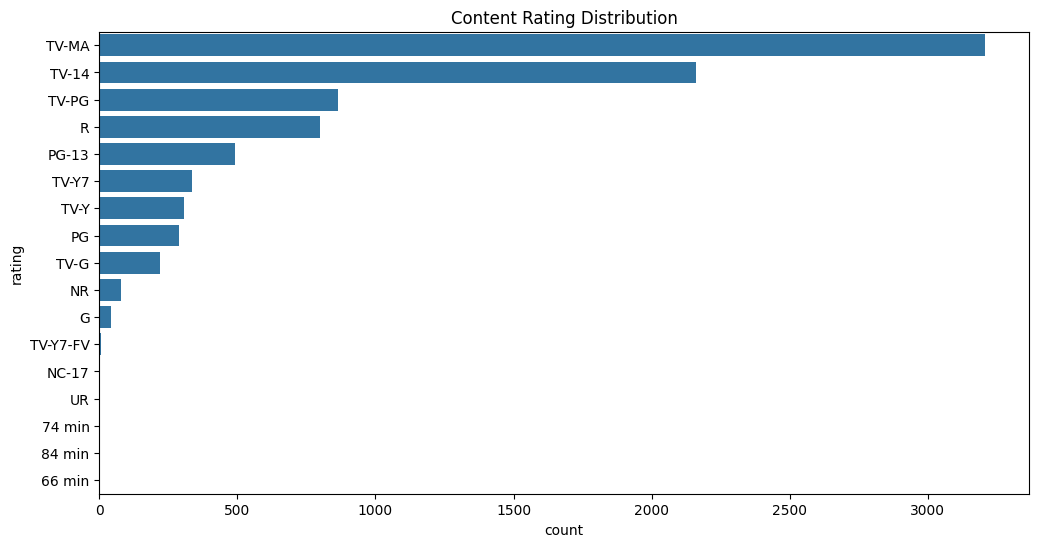


Release Year Count:
 release_year
2021     592
2020     953
2019    1030
2018    1147
2017    1032
Name: count, dtype: int64


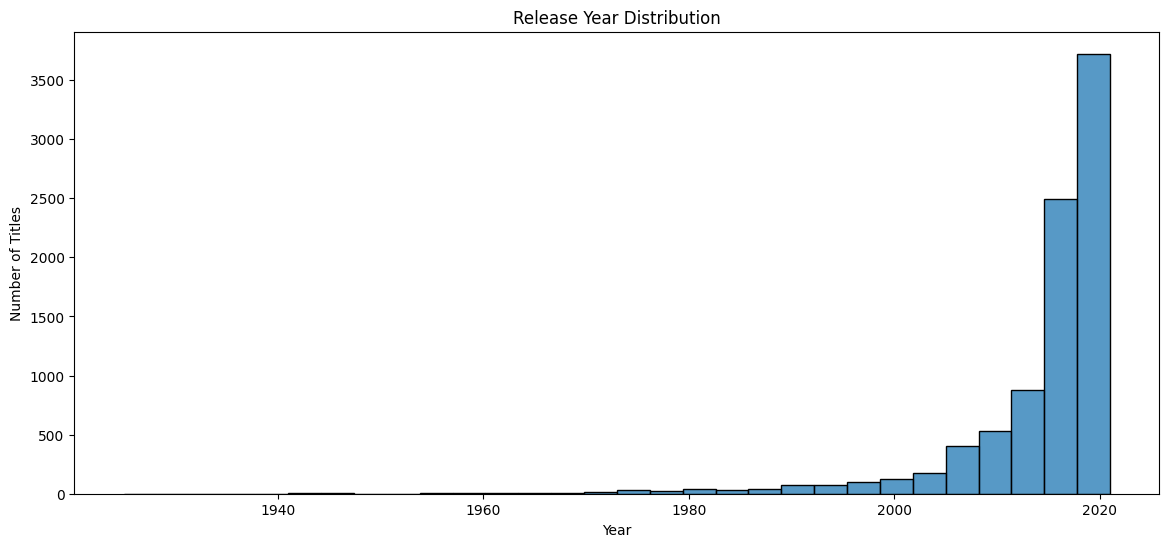


Duration Examples:
 duration
1 Season     1793
2 Seasons     425
3 Seasons     199
90 min        152
97 min        146
Name: count, dtype: int64


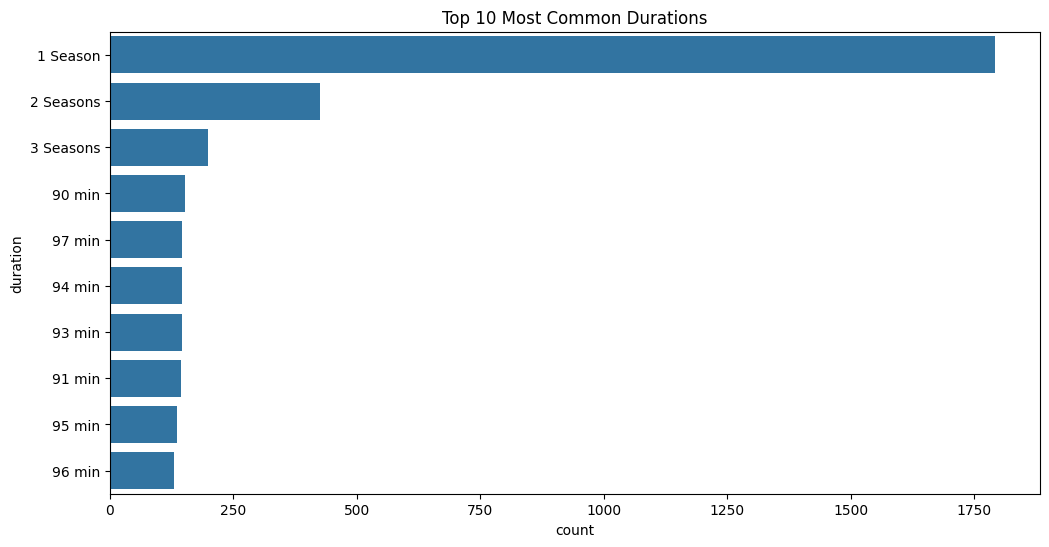


Top Countries:
 country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


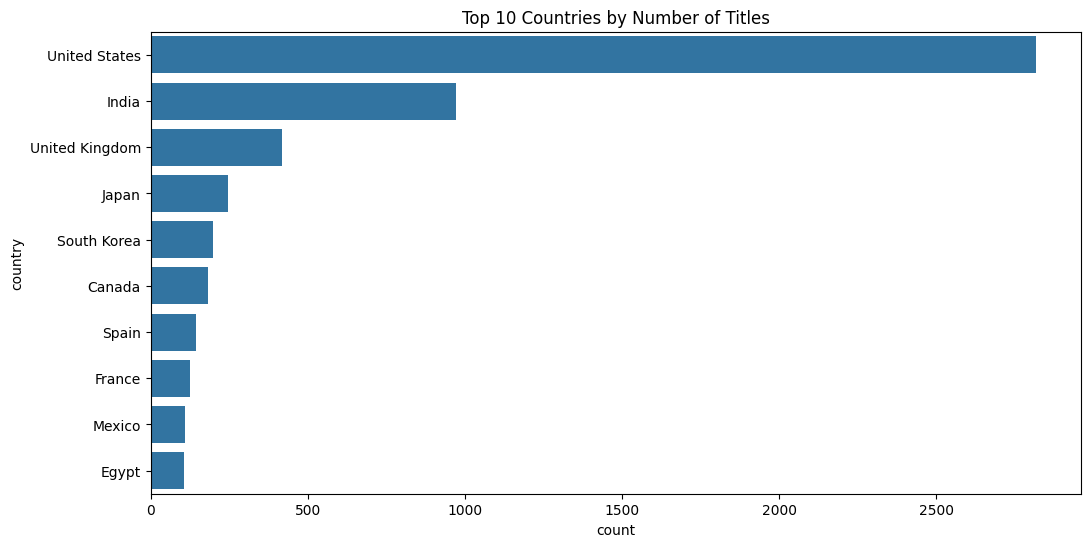


Top Genres:
 International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
dtype: int64


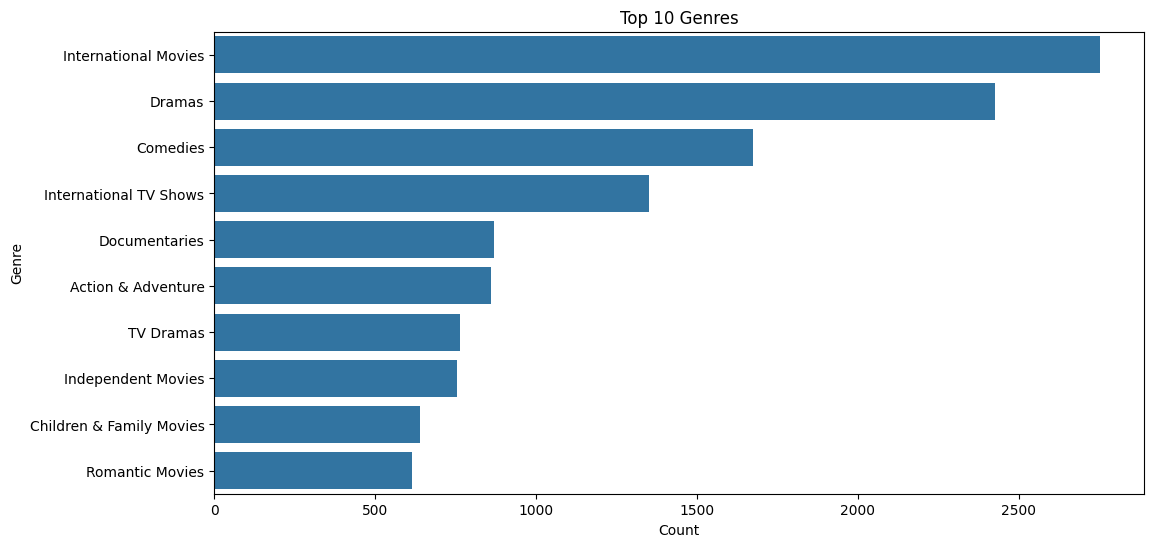

In [15]:
# Analyze 'type' (Movie or TV Show)
print("\nType Count:\n", df['type'].value_counts())

sns.countplot(x='type', data=df)
plt.title('Content Type Distribution')
plt.show()

# Analyze 'rating' (TV-MA, PG, etc.)
print("\nRating Distribution:\n", df['rating'].value_counts())

plt.figure(figsize=(12, 6))
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.show()

# Analyze 'release_year'
print("\nRelease Year Count:\n", df['release_year'].value_counts().sort_index(ascending=False).head())

plt.figure(figsize=(14, 6))
sns.histplot(df['release_year'], bins=30, kde=False)
plt.title('Release Year Distribution')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

# Analyze 'duration' (Note: different format for Movies vs TV Shows)
print("\nDuration Examples:\n", df['duration'].value_counts().head())

plt.figure(figsize=(12, 6))
sns.countplot(y='duration', data=df, order=df['duration'].value_counts().head(10).index)
plt.title('Top 10 Most Common Durations')
plt.show()

# Analyze 'country'
print("\nTop Countries:\n", df['country'].value_counts().head(10))

plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=df, order=df['country'].value_counts().head(10).index)
plt.title('Top 10 Countries by Number of Titles')
plt.show()

# Analyze 'listed_in' (Genres)
# NOTE: This column can have multiple genres in one cell, so we'll need to split them
from collections import Counter

all_genres = df['listed_in'].dropna().str.split(', ')
flat_genres = [genre for sublist in all_genres for genre in sublist]
genre_counts = pd.Series(Counter(flat_genres)).sort_values(ascending=False)

print("\nTop Genres:\n", genre_counts.head(10))

plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.head(10).values, y=genre_counts.head(10).index)
plt.title('Top 10 Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()





Type by Rating:
 type     rating  
Movie    TV-MA       2062
         TV-14       1427
         R            797
         TV-PG        540
         PG-13        490
         PG           287
         TV-Y7        139
         TV-Y         131
         TV-G         126
         NR            75
         G             41
         TV-Y7-FV       5
         NC-17          3
         UR             3
         66 min         1
         74 min         1
         84 min         1
TV Show  TV-MA       1145
         TV-14        733
         TV-PG        323
         TV-Y7        195
         TV-Y         176
         TV-G          94
         NR             5
         R              2
         TV-Y7-FV       1
Name: count, dtype: int64


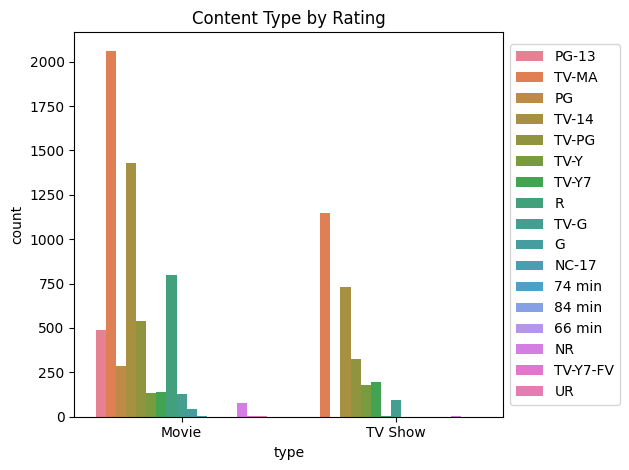


Type by Top 5 Countries:
 country         type   
India           Movie       893
                TV Show      79
Japan           TV Show     169
                Movie        76
South Korea     TV Show     158
                Movie        41
United Kingdom  TV Show     213
                Movie       206
United States   Movie      2058
                TV Show     760
Name: count, dtype: int64


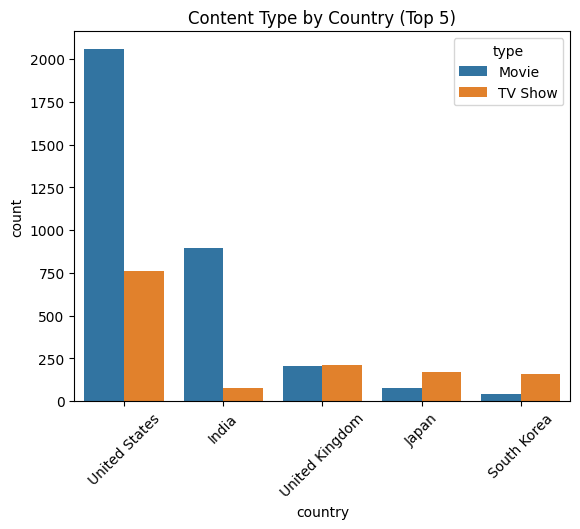

/tmp/ipython-input-16-552077458.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nContent Type by Release Period:\n", df.groupby('release_group')['type'].value_counts())



Content Type by Release Period:
 release_group  type   
<1980          Movie       124
               TV Show       8
1980-2000      Movie       385
               TV Show      44
2000-2015      Movie      2003
               TV Show     586
2015+          Movie      3619
               TV Show    2037
Name: count, dtype: int64


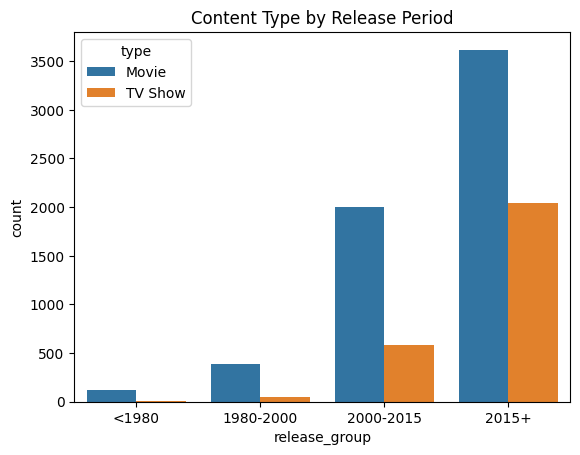


Content Type by Main Genre:
 genre_main                type   
Action & Adventure        Movie       859
Anime Features            Movie        21
Anime Series              TV Show     176
British TV Shows          TV Show     253
Children & Family Movies  Movie       605
Classic & Cult TV         TV Show      22
Classic Movies            Movie        80
Comedies                  Movie      1210
Crime TV Shows            TV Show     399
Cult Movies               Movie        12
Documentaries             Movie       829
Docuseries                TV Show     221
Dramas                    Movie      1600
Horror Movies             Movie       275
Independent Movies        Movie        20
International Movies      Movie       128
International TV Shows    TV Show     774
Kids' TV                  TV Show     388
LGBTQ Movies              Movie         1
Movies                    Movie        57
Name: count, dtype: int64


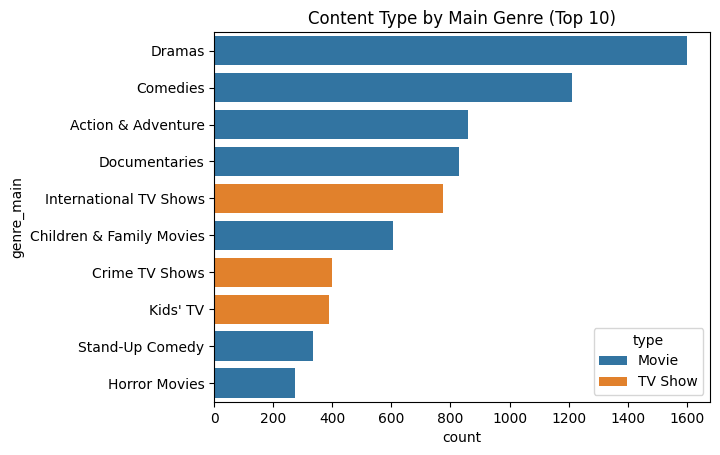

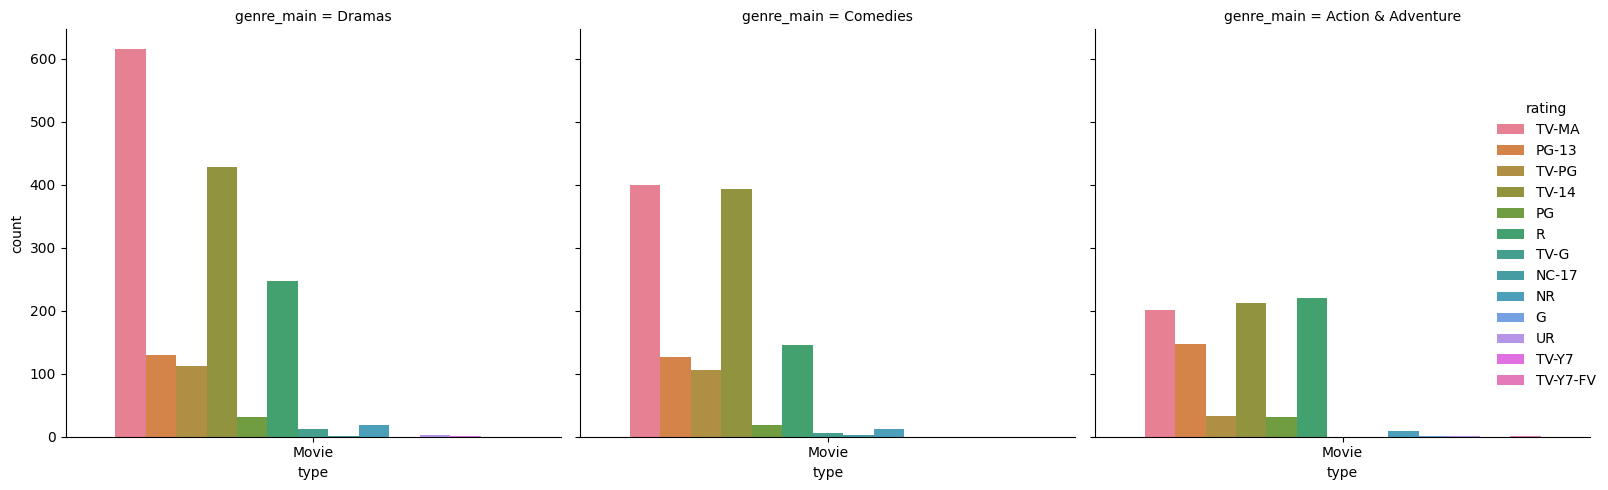

In [16]:
# ANALYSIS 1: Content type vs rating
print("\nType by Rating:\n", df.groupby('type')['rating'].value_counts())

sns.countplot(x='type', hue='rating', data=df, order=['Movie', 'TV Show'])
plt.title('Content Type by Rating')
plt.xticks(rotation=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# ANALYSIS 2: Content type vs country
top_countries = df['country'].value_counts().nlargest(5).index
df_top_countries = df[df['country'].isin(top_countries)]

print("\nType by Top 5 Countries:\n", df_top_countries.groupby('country')['type'].value_counts())

sns.countplot(x='country', hue='type', data=df_top_countries)
plt.title('Content Type by Country (Top 5)')
plt.xticks(rotation=45)
plt.show()

# ANALYSIS 3: Type by release year bins
df['release_group'] = pd.cut(df['release_year'], bins=[1940, 1980, 2000, 2015, 2025],
                              labels=['<1980', '1980-2000', '2000-2015', '2015+'])

print("\nContent Type by Release Period:\n", df.groupby('release_group')['type'].value_counts())

sns.countplot(x='release_group', hue='type', data=df)
plt.title('Content Type by Release Period')
plt.show()

# ANALYSIS 4: Genre vs Type (like age_group survival)
from collections import Counter

df['genre_main'] = df['listed_in'].fillna('Unknown').apply(lambda x: x.split(',')[0])

print("\nContent Type by Main Genre:\n", df.groupby('genre_main')['type'].value_counts().head(20))

sns.countplot(y='genre_main', hue='type', data=df,
              order=df['genre_main'].value_counts().head(10).index)
plt.title('Content Type by Main Genre (Top 10)')
plt.show()

# ANALYSIS 5: Combination example – Type vs Rating vs Genre
sns.catplot(x='type', hue='rating', col='genre_main', kind='count',
            data=df[df['genre_main'].isin(df['genre_main'].value_counts().head(3).index)])
plt.tight_layout()
plt.show()

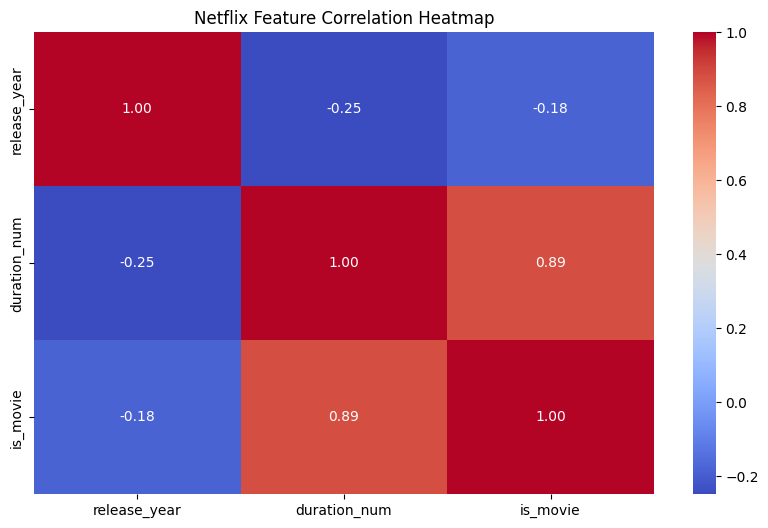

In [17]:

# --- Clean and prepare duration column ---
# Separate numeric duration (e.g., "90 min" → 90, "2 Seasons" → 2)
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)

# Rename type of content
df['is_movie'] = df['type'].apply(lambda x: 1 if x == 'Movie' else 0)

# --- Create correlation heatmap ---
plt.figure(figsize=(10, 6))

numeric_features = df[['release_year', 'duration_num', 'is_movie']]

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Netflix Feature Correlation Heatmap')
plt.show()
